In [94]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
#Librerías de visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 2. Ejercicios

### 2.1. Cargar los datos y pequeño EDA
2.1.1.Carga el archivo 'bank-limpio-sin-nulos.csv'

2.1.2. Realiza un pequeño EDA en el que obtengas:
- Dimensiones del DF
- Nombre de las columnas
- Número de nulos y tipo de datos de las columnas.
- Descripción de los estadísticos de las columnas.
- Valores únicos de las columnas categóricas y conteo de los mismos.
- Total de nulos y duplicados.

In [95]:
Bank= pd.read_csv("..//EDA//bank-limpio-sin-nulos.csv", index_col=0) #acuerdate del index col para que no se duplique la 1 columna de las rows
print(f'Las Dimensiones del data set son: {Bank.shape[0]} filas y {Bank.shape[1]} columnas \n')
print('*****')  

print (f'Los nombres de columnas son:\n{Bank.columns}\n')
print('*****')

Bank_info = pd.DataFrame({
    'Null Count': Bank.isnull().sum(),
    'Dtype': Bank.dtypes})
                    
print(f'Los campos nulos y tipo de dato por columna son:\n {Bank_info}\n')
print('*****')

print(f'Los datos estadísticos son{Bank.describe()}\n')
print('*****')



Las Dimensiones del data set son: 43000 filas y 30 columnas 

*****
Los nombres de columnas son:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id',
       'contact_month', 'contact_year'],
      dtype='object')

*****
Los campos nulos y tipo de dato por columna son:
                    Null Count    Dtype
age                         0  float64
job                         0   object
marital                     0   object
education                   0   object
default                     0   object
housing                     0   object
loan                        0   object
contact                     0   object
duration                    0    int64
campaign                    0 

In [96]:
#Datos numericos
Bank.describe(include='O').T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,3,married,26084
education,43000,8,university degree,12722
default,43000,2,No,42997
housing,43000,3,Si,22498
loan,43000,2,No,36468
contact,43000,2,cellular,27396
pdays,43000,27,unknown,41412
poutcome,43000,3,nonexistent,37103
y,43000,2,no,38156


In [97]:
#datos categoricos
Bank_categoricos = Bank.select_dtypes(include= 'O') #saco los datos que son solo objetos

Lista_Bank_categoricos = Bank_categoricos.columns.to_list()#creo una lista con los nombres de las columnas categoricas xa iterar por ellas:

print(f'Las columnas categoricas son:\n {Lista_Bank_categoricos}n')
print(' ')
for col in Lista_Bank_categoricos:
  print(f'El conteo de valores únicos de la columna {col.upper()} son: \n{Bank_categoricos[col].value_counts()}')
  print(f'Los valores únicos son:\n {Bank_categoricos[col].unique()}\n')
print('---------------------------------------------------')

print(f'Total de valores nulos:\n{Bank.isnull().sum()}\n')

print(f'Total de valores duplicados:\n{Bank.duplicated().sum()}')



Las columnas categoricas son:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y', 'date', 'dt_customer', 'id', 'contact_month']n
 
El conteo de valores únicos de la columna JOB son: 
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            345
Name: count, dtype: int64
Los valores únicos son:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

El conteo de valores únicos de la columna MARITAL son: 
marital
married     26084
single      12105
divorced     4811
Name: count, dtype: int64
Los valores únicos son:
 ['married' 'single' 'divorced']

El conteo de valores únicos de la columna EDUCATION son: 
education
university degree

### 2.2. Visualización
2.2.1. Identifica la métrica principal de nuestro conjunto de datos. (Es la columna que nos va a dar más información sobre el problema de esta empresa.)

2.2.2. Calcula el porcentaje de usuarios suscritos (pieplot).
- Recuerda que siempre que hacemos un pieplot antes debes hacer un DF con un groupby agrupando por la columna que queremos estudiar.

2.2.3. Realiza una linea temporal con el total de llamadas realizadas a lo largo de la campaña agrupando por mes (line).

2.2.4. Comprueba la distribución de llamadas en función del mes del año indicando si el cliente se ha suscrito o no (countplot con agrupación en la columna ‘y)

2.2.5. Haz un subplot donde haya 4 gráficos de barras de las columnas 'duration', 'numwebvisitsmonth', 'pdays' e ‘income’, un stripplot de la columna ‘campaign’ y un violinplot de la columna ‘age’.
- En todas las gráficas queremos relacionar las variables con la columna ‘y’

2.2.6. Crea un subplot con dos pieplot que nos muestre la distribución del estado civil del cliente (‘marital’) en función de las suscripciones (‘y’).

2.2.7. Haz lo mismo que en el ejercicio anterior pero ahora con la columna ‘contact’.

2.2.8. Crea un violinplot con la distribución de la forma de contacto ‘contact’, la edad ‘age’ y la suscripción ‘y’

2.2.9. Realiza un histplot con la cantidad de llamadas realizadas en función de los contactos previos durante la campaña (‘previous’). Agrupa por la columna ‘y’.

2.2.10. Crea un subplot con dos pieplot que nos muestre la forma con la que se contactó con el cliente (‘contact’’) en función de las suscripciones (‘y’).


In [98]:
###2.VISUALIZACION
"""La métrica principal que nos da la info que el cliente quiere es la columna y. El cliente quiere medir el éxito o no de su campaña de Mk, su fin por tanto es el numero de clientes que se suscribieron gracias a los contactos realizados por la campaña."""
#Calcular el porcentaje de usuarios suscritos (pieplot)
""" Creamos antes un df con group by por la columnas a estudiar"""
Bank_y= Bank.groupby('y')['id'].count().reset_index() #saco valores unicos de la col#con el reset_index lo convierto endf
Bank_y



,y,id
0,no,38156
1,yes,4844


In [99]:
#2.2.2. Calcula el porcentaje de usuarios suscritos (pieplot).
Fig2_tarta =px.pie(Bank_y,values= 'id', names = "y", color=['no','yes'])
Fig2_tarta.update_layout(
    title=dict(text = "Distribución de contacactos suscritos contactados por la campaña .", font = dict(size = 15), automargin = True, yref = 'paper', x = 0.2,y = 1),
    legend=dict(
    yanchor = "top",
    y = 0.99,
    xanchor = "left",
    x = 0.75))

Fig2_tarta

Los resultados no son muy positivos ya que solo un 11,3% se ha suscrito a través de la campaña a su producto bancario.

2.2.3. Realiza una linea temporal con el total de llamadas realizadas a lo largo de la campaña agrupando por mes (line).

In [100]:
""" Para hacer la linea temporal nos vamos a la columna date, que vemos q su tipo es object ya que teniamos valores desconocidos. por eso nos vamos a crera 1 un df de date sin los desconocidos"""
df_date = Bank[Bank['date'] !='unknown'] 
#ahora solo tenemos los registros del df que no tiene unknown asi que podemos convertirla a tipo fecha con pandas y to_datetime( daf[col, format ='%Y-%m-%d')
df_date['date']=pd.to_datetime(df_date['date'],format= '%Y-%m-%d')
df_date =df_date['date'].value_counts().reset_index()
df_date

C:\Users\MJDG1\AppData\Local\Temp\ipykernel_28740\3963282381.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,count
0,2018-02-28,95
1,2016-02-28,94
2,2015-02-28,92
3,2017-02-28,89
4,2019-02-28,85
...,...,...
1820,2016-07-02,11
1821,2015-04-14,10
1822,2015-11-20,10
1823,2017-04-04,10


In [101]:
""" Vamos a hacer una especie de group by para fechas con metodo de pandas .resample()... en la info en internet nos dasran los parametros"""
df_date=df_date.resample('ME', on ='date').sum()
#vemos que ha cogido la columna date como index porque no pusimos el reset index
df_date.reset_index(drop=False,inplace = True) #drop para que no elimine la columna actual y el inplace para que nos pise.
df_date


,date,count
0,2015-01-31,706
1,2015-02-28,709
2,2015-03-31,766
3,2015-04-30,719
4,2015-05-31,715
5,2015-06-30,700
6,2015-07-31,713
7,2015-08-31,674
8,2015-09-30,713
9,2015-10-31,712


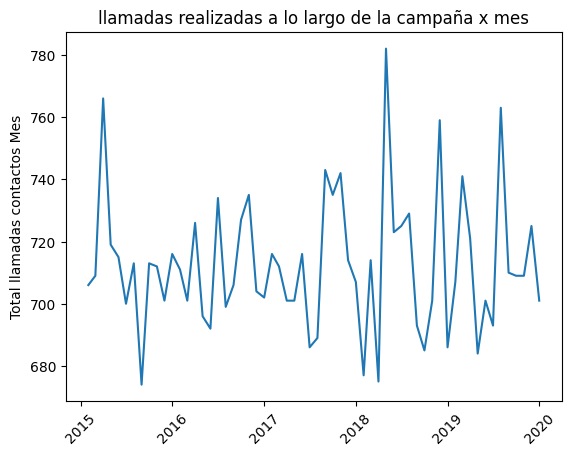

In [102]:
#Matplotlib
Fig2_linea_plt = plt.plot(df_date['date'],df_date['count'],label ='llamadas')
plt.xticks(rotation =45)
plt.ylabel('Total llamadas contactos Mes')
plt.title('llamadas realizadas a lo largo de la campaña x mes')
plt.show()

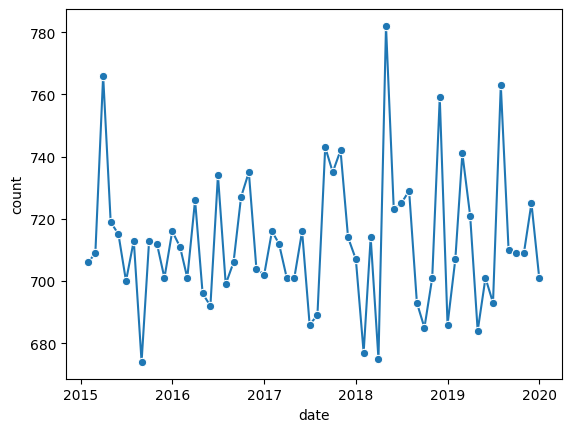

In [103]:
fig2sns =sns.lineplot(x = "date", y = "count", data = df_date,
             marker = "o")

In [104]:
#con px (plotly)
fig2px = px.line(df_date, x = 'date', y = 'count',markers=True,title = "Llamadas a lo largo del tiempo")
fig2px.update_traces(line = dict(dash = "dot", width = 4, color = "green"),
                  marker = dict(color = "darkblue", size = 10, opacity = 0.8))

fig2px.show()

vemos que no ha habido muchos cambios en lo aue se refiere a numero de llamadas mes, a lo largo del tiempo siguen enun intervalo de674 a  782,

Text(0.5, 1.0, 'Distribucion de llamadas mpor mes')

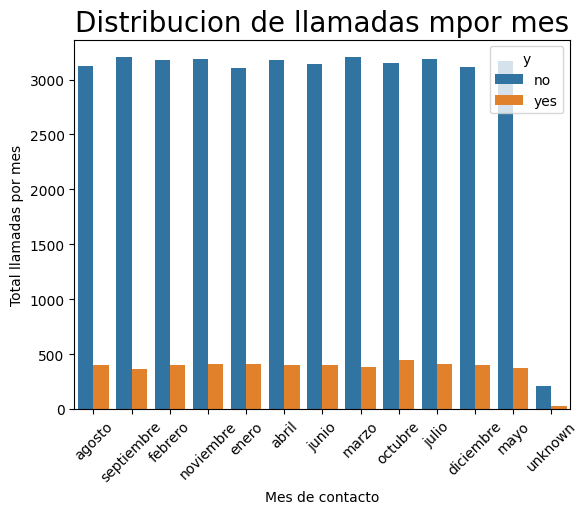

In [105]:
Fig_Countplot_suscritos= sns.countplot(data= Bank, x= 'contact_month',hue= 'y')#utilizo el  parámetro hue xq me permite desglosar los datos en diferentes categorías dentro de las barras. Esto es útil para visualizar comparaciones entre diferentes grupos dentro de la misma variable.
Fig_Countplot_suscritos.set_xlabel("Mes de contacto")
plt.xticks(rotation =45)
Fig_Countplot_suscritos.set_ylabel("Total llamadas por mes")
Fig_Countplot_suscritos.set_title("Distribucion de llamadas mpor mes", fontsize = 20)

2.2.5. Haz un subplot donde haya 4 gráficos de barras de las columnas 'duration', 'numwebvisitsmonth', 'pdays' e ‘income’, un stripplot de la columna ‘campaign’ y un violinplot de la columna ‘age’.
- En todas las gráficas queremos relacionar las variables con la columna ‘y’


Text(0.5, 1.0, 'Relación contactados y edad de clients')

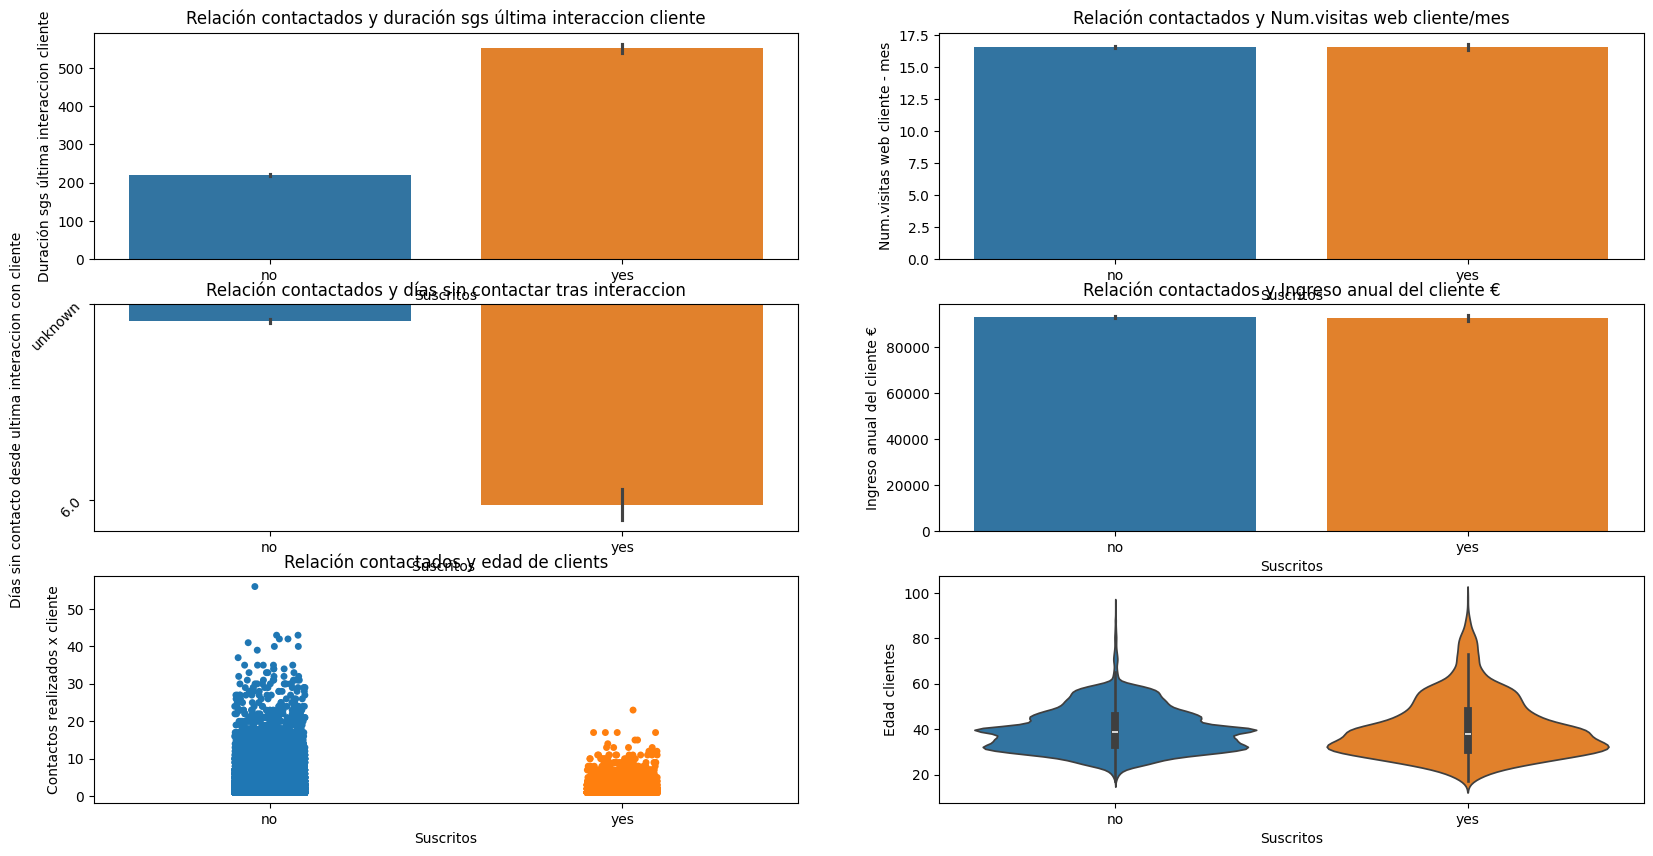

In [106]:
"""SUBPLOT"""
fig2_subplot_barras, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10))
# Vamos a empezar por la relacion entre 'y' 'duration
sns.barplot(y= 'duration', x = 'y',ax = axes[0,0],hue='y', data = Bank) # Hay que indicar la posición del gráfico con ax = axes[posición].eneste caso al ser el primero, será 0 rows,0 col.
# ahora la relacion con numwebvisitsmonth:
sns.barplot(y = 'numwebvisitsmonth', x = 'y',ax = axes[0,1],hue='y', data = Bank)
# en 3 lugar vamos con la relacion con pdays
sns.barplot (y ='pdays', x= 'y',ax = axes[1,0],hue='y', data = Bank)
axes[1,0].tick_params(axis='y', rotation=45) #aqui estoy hacien rotar los datos del eje x del grafico posicionado 1,0
#por último la relacion de y con income
sns.barplot(y = 'income', x= 'y',ax = axes[1,1],hue='y', data = Bank)
#stripplot
sns.stripplot(x ='y',y='campaign',ax =axes [2,0],hue ='y',data=Bank)
#violinplot 
sns.violinplot(x ='y',y='age',ax =axes [2,1],hue ='y',data=Bank)

#ahora indicamos por la posicion de cada grafico sus titulos y etiquetas de ejes:

#y/duration
axes[0,0].set_ylabel("Duración sgs última interaccion cliente")

axes[0,0].set_xlabel("Suscritos")

axes[0,0].set_title("Relación contactados y duración sgs última interaccion cliente" , fontsize = 12)
# y/ numwebvisitsmooth
axes[0,1].set_ylabel("Num.visitas web cliente - mes")

axes[0,1].set_xlabel("Suscritos")

axes[0,1].set_title("Relación contactados y Num.visitas web cliente/mes" , fontsize = 12)

# y/ pdays

axes[1,0].set_ylabel("Días sin contacto desde ultima interaccion con cliente ")

axes[1,0].set_xlabel("Suscritos ")

axes[1,0].set_title("Relación contactados y días sin contactar tras interaccion" , fontsize = 12)

# y/ income
axes[1,1].set_ylabel("Ingreso anual del cliente €")

axes[1,1].set_xlabel("Suscritos")

axes[1,1].set_title("Relación contactados y Ingreso anual del cliente €" , fontsize = 12)
# y / campaign
axes[2,0].set_xlabel("Suscritos")
axes[2,0].set_ylabel("Contactos realizados x cliente")
axes[2,0].set_title("Relación contactados y contactos realizados x cliente" , fontsize = 12)
#y/age
axes[2,1].set_xlabel("Suscritos")
axes[2,1].set_ylabel("Edad clientes")
axes[2,0].set_title("Relación contactados y edad de clients" , fontsize = 12)

Ananlisis:
Relacion duracion sg ultima interaccion cliente cons suscritos: Las llamadas con mas duración son clientes que se han suscritos
Relacion suscripciones con visitas en la web: no se puede ver relacion porque son iguales
RElacion numero de llamadas , a partir de las 20 llamadas son mas los casos de n suscripcion que de si, por lo que puede estar siendo una perdida de tiempo llamar mas de 20veces.
Relacion  suscripciones ingresos no hay relacion
En la edad vemos que a partir de los 60 años vemos que se ensanchan mas indicando que son mas propensos a partir de esa edad.


STRIPPLOY Y VIOLINPLOT

STRIPPLOT
se utiliza para visualizar la distribución de datos individuales a lo largo de una variable categórica. Es similar a un gráfico de dispersión, pero está diseñado para mostrar cómo se distribuyen los puntos a lo largo de categorías, lo que permite observar patrones y posibles agrupamientos o dispersiones en los datos.

Principales usos del stripplot:
Visualizar la dispersión de datos: Muestra cómo los valores de una variable continua se distribuyen para diferentes categorías.
Identificar outliers: Puedes identificar valores atípicos o extremos en los datos.
Comparar distribuciones: Te permite comparar la distribución de datos entre diferentes grupos categóricos.

VIOLINPLOT:

s un tipo de gráfico que combina aspectos del boxplot y el kdeplot (gráfico de densidad de núcleo). Es útil para visualizar la distribución de una variable continua a lo largo de categorías y permite ver tanto la distribución de los datos como los valores atípicos y la forma de la distribución.

Características principales del violinplot:
Distribución completa: Muestra la densidad estimada de la variable continua para cada categoría.
Simetría: Se dibuja de manera simétrica a ambos lados del punto central de la categoría, lo que lo asemeja a la forma de un violín (de ahí su nombre).
Información adicional sobre la distribución: Además de la forma de la distribución, puedes ver cuántos datos están agrupados en diferentes regiones de cada categoría.
Comparación de grupos: Es útil para comparar la forma y dispersión de los datos entre diferentes categorías.

PARAMETROS VIOLINPLOT:(X=, Y=, DATA =)
Personalización del violinplot:

***Dividir por hue: Puedes usar hue para dividir el gráfico por una tercera variable categórica (coloreando la distribución de acuerdo con esa variable):
Código:
sns.violinplot(x='contact_month', y='campaign', hue='y', data=Bank, split=True)

***Inner: Puedes añadir un gráfico adicional dentro del violinplot. Por ejemplo, puedes añadir un boxplot interno o puntos para mostrar los datos individuales:
Código:
sns.Violinplot(x='contact_month', y='campaign', data=Bank, inner='box')
 
**** Opciones para inner:
'box': Dibuja un boxplot dentro del violín.
'quartile': Muestra las líneas de los cuartiles.
'point': Muestra los datos como puntos individuales.

***Jitter: Si tienes muchos datos que se agrupan en una categoría, puedes agregar jitter para separar un poco los puntos y visualizar mejor las distribuciones de datos individuales:

ANALISIS DEL SUBPLOT:

2.2.6. Crea un subplot con dos pieplot que nos muestre la distribución del estado civil del cliente (‘marital’) en función de las suscripciones (‘y’).


In [107]:
" quiero saber por estado civil cuantos hay suscritos o no"
#voy a contar por estado civil cuantos clientes sí estan suscritos(df_suscritos) y lo agrupo por su estado civil en función al id (al cliente)
df_Suscritos_ec = Bank[Bank['y']== 'yes'].groupby('marital')['id'].count().reset_index()
display(df_Suscritos_ec)
df_No_Suscritos_ec = Bank[Bank['y'] == 'no'].groupby('marital')['id'].count().reset_index()
display(df_No_Suscritos_ec)
#sintaxis agrupacion para df:
#df=df[df[columna a aplicar condicion ]condicion].groupby('columna a por la que agrupamos')['columna a la que vamos a hacer fx de agregacion] .fxagregacion().reset_index())

,marital,id
0,divorced,490
1,married,2668
2,single,1686


,marital,id
0,divorced,4321
1,married,23416
2,single,10419


In [108]:
fig2_subplot_tartas_marital= make_subplots(
    rows = 1, cols = 2,
    column_widths = [3, 2], # Define las proporciones de las columnas
    row_heights = [3],# Altura de la fila
    specs = [[{"type": "domain"}, {"type": "domain"}]],# Especifica que ambos subplots serán gráficos de tarta (dominio)
      subplot_titles = ['Suscritos', 'No suscritos'])#le damos los tituos por grafico
fig2_subplot_tartas_marital.add_trace(go.Pie(labels = ['divorced','married','single'],#El método add_trace() en Plotly se utiliza para agregar trazas (gráficos o conjuntos de datos) a una figura. 
#go.Pie es la fx que indica grafico de tarta
						 values = df_Suscritos_ec['id'],
             name ='marital',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 1)
fig2_subplot_tartas_marital.add_trace(go.Pie(labels = ['divorced','married','single'],
						 values = df_No_Suscritos_ec['id'],
             name ='marital',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 2)
fig2_subplot_tartas_marital.update_layout(title_text='Distribución por estado civil del cliente')

fig2_subplot_tartas_marital

Analisis fig marital.
si nos fijamos en los suscritos y no suscritos la campaña esta llegando mejor a los solteros porque hay un imcremento en compararcion de suscritos con no suscritos, el resto de categorias bajan el porcentake en suscritos en comparacion a no suscritos

"""cada vez que llamas a add_trace(), estás añadiendo un gráfico específico a la figura que estás creando. Este método es muy flexible y permite añadir múltiples gráficos dentro de un mismo subplot o figura.
Parametros del trace:  El gráfico que quieres agregar. Puede ser cualquier objeto de gráfico de Plotly (como go.Scatter, go.Bar, go.Pie, etc.)."""

#tipos de specs:
"""
"xy: Gráficos bidimensionales, como líneas y barras.
"domain": Gráficos circulares (tarta, radar).
"scene": Gráficos 3D.
"polar": Gráficos en coordenadas polares.
"ternary": Gráficos ternarios.
"mapbox": Gráficos geoespaciales.
"carpet": Gráficos de malla (carpet plots).
"table": Gráficos tipo tabla.
"ohlc" / "candlestick": Gráficos financieros de velas y OHLC."""

2.2.7. Haz lo mismo que en el ejercicio anterior pero ahora con la columna ‘contact’.

In [114]:
df_suscritos_campaña= Bank[Bank['y'] == 'yes'].groupby('contact')['id'].count().reset_index()
display(df_suscritos_campaña)
df_No_Suscritos_campaña = Bank[Bank['y'] =='no'].groupby('contact')['id'].count().reset_index()
display(df_No_Suscritos_campaña)

,contact,id
0,cellular,4039
1,telephone,805


,contact,id
0,cellular,23357
1,telephone,14799


In [116]:
fig2_subplot_tartas_contacto= make_subplots(
    rows = 1, cols = 2,
    column_widths = [3, 2], # Define las proporciones de las columnas
    row_heights = [3],# Altura de la fila
    specs = [[{"type": "domain"}, {"type": "domain"}]],# Especifica que ambos subplots serán gráficos de tarta (dominio)
      subplot_titles = ['Suscritos', 'No suscritos'])#le damos los tituos por grafico
fig2_subplot_tartas_contacto.add_trace(go.Pie(labels = ['cellular','telephone'],#El método add_trace() en Plotly  para agregar trazas (gráficos o conjuntos de datos) a una figura. 
#go.Pie es la fx que indica grafico de tarta
						 values = df_suscritos_campaña['id'],
             name ='contact',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 1)
fig2_subplot_tartas_contacto.add_trace(go.Pie(labels =['cellular','telephone'],
						 values = df_No_Suscritos_campaña['id'],
             name ='contact',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 2)
fig2_subplot_tartas_contacto.update_layout(title_text='Distribución por contacto campaña')

Vemos que se contacta en ambos casos más  a traves de cellular y que el aumnera el numero de suscritos es un 22% en el contacto a traves de llamadas de celular

In [111]:
#2.2.8. Crea un violinplot con la distribución de la forma de contacto ‘contact’, la edad ‘age’ y la suscripción ‘y’
fig2_violinEdades = px.violin(Bank, y = 'age', x = 'contact', color = 'y', box = True, #color='y': Los datos estarán coloreados en función de la columna y, que indica si el usuario está suscrito (yes) o no (no).box=True: Además de la estimación de densidad del gráfico de violín, añade un gráfico de caja (box plot) dentro de cada violín para ver mejor la mediana, cuartiles y posibles valores atípicos.
								color_discrete_map = {'yes':'#489C9E','no':'#495084'},# diccionario que asigna colores específicos a las categorías de y. En este caso, los suscritos (yes) serán de color #489C9E y los no suscritos (no) de color #495084.
                labels = dict(age = 'Edad del usuario',	 contact = 'Forma de contacto campaña'),)#el uso de un diccionario (dict) en el parámetro labels es necesario para mapear los nombres de las columnas originales del DataFrame a etiquetas más legibles o descriptivas.Aplicar estas etiquetas de manera automática en el gráfico, sin necesidad de cambiar los nombres de las columnas originales en los datos.Sin el diccionario labels, Plotly usaría los nombres exactos de las columnas del DataFrame, que podrían ser menos claros. Por ejemplo, si en tu DataFrame tienes columnas llamadas age y contact, estas aparecerían con esos nombres en el gráfico, lo cual podría no ser ideal para un gráfico dirigido a un público más general. Al usar labels, puedes hacer que los gráficos sean más interpretables.
#Personalizo el grafico:(update_layout) 											
fig2_violinEdades.update_layout(title = dict(text = "Distribución de las suscripciones con la forma de contacto y la edad.", 
															 font = dict(size = 20),
															 automargin = True,
															 yref = 'paper',
															 x = 0.1,
															 y = 1))
#Aclaración parámetros utilizados para personalizar el gráfico, en este caso especialmente personalizamos el título 
"""fig.update_layout(): Esta función ajusta el diseño general de la figura.
title=dict(...): Aquí se configura el título del gráfico con varios parámetros:
text="Distribución de las suscripciones con la forma de contacto y la edad.": Este es el texto del título que describe lo que representa el gráfico.
font=dict(size=30): El tamaño del texto del título es 30.
automargin=True: Asegura que haya espacio suficiente en los márgenes para que el título no sea cortado.
yref='paper': El eje Y del título se refiere a la figura ("paper") y no a los datos del gráfico.
x=0.1: Esto posiciona el título ligeramente a la derecha en el gráfico (10% del ancho total).
y=1: Coloca el título en la parte superior del gráfico (valor máximo del eje Y)."""
#'paper'se refiere al área total de la figura o del lienzo sobre el que se dibuja el gráfico, incluyendo los márgenes, títulos, leyendas, ejes, etc. Es diferente del espacio ocupado únicamente por los datos del gráfico (que sería el área correspondiente a los ejes X e Y, por ejemplo).
fig2_violinEdades.show()

Vemos que el movil es la forma mas comun  para suscribirse y mayores de 60 

2.2.9. Realiza un histplot con la cantidad de llamadas realizadas en función de los contactos previos durante la campaña (‘previous’). Agrupa por la columna ‘y’.

Text(0, 0.5, 'contactados')

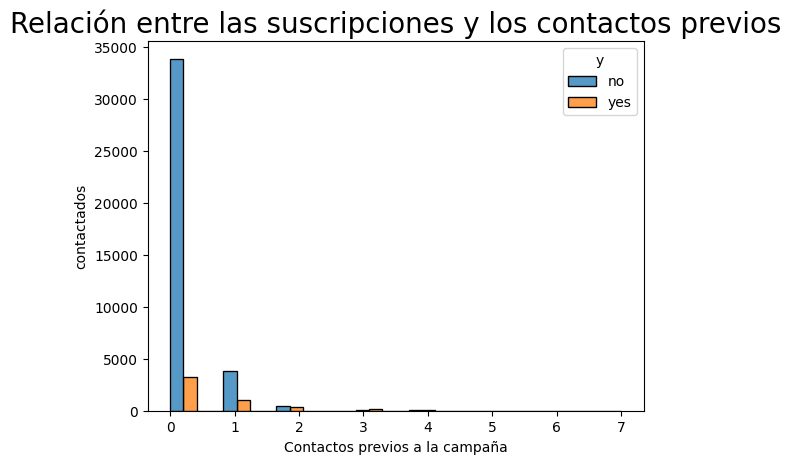

In [112]:
fig2_hisplot =sns.histplot(data=Bank,x ='previous',hue ='y',multiple="dodge")
fig2_hisplot.set_title('Relación entre las suscripciones y los contactos previos',fontsize = 20)
fig2_hisplot.set_xlabel('Contactos previos a la campaña')
fig2_hisplot.set_ylabel('contactados')


En este grafico es tan alto el numero de clientes que no habiamos contactado previamente a la campaña que no podemos ver bien la relacion  con las llamadas previas por lo que vamos a obviar el dato de 0 contactos previos y que la grafica empiece a mostrarnos a aprtir del 1 contacto.


<Axes: title={'center': 'Relación entre las suscripciones y los contactos previos'}, xlabel='Contactos previos durante la campaña', ylabel='Usuarios contactados'>

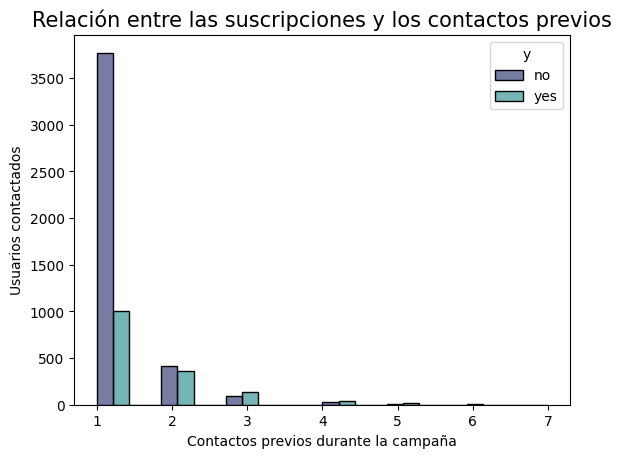

In [118]:
previous=Bank[Bank['previous'] > 0]
ax = sns.histplot(previous,x = 'previous', 
									hue = 'y',
			            multiple = "dodge", 
									palette = {'yes':'#489C9E','no':'#495084'})
ax.set_title("Relación entre las suscripciones y los contactos previos",fontsize = 15)
ax.set_xlabel('Contactos previos durante la campaña')
ax.set_ylabel('Usuarios contactados')
ax

Aquí podemos ver cómo a medida que más vamos contactando con los usuarios repetidas veces la diferencia entre la gente que se suscribe y la que no se va disminuyendo, por lo que la gente a partir del 3 contacto es mas probable que se suscriban.

Explicacion parametro multiple

El parámetro multiple tiene varios valores posibles:
multiple="layer" (por defecto):

Las barras de diferentes categorías se superponen unas sobre otras.
Este es el comportamiento predeterminado si no especificas multiple.
multiple="stack":

Las barras se apilan verticalmente. Es decir, las categorías en hue se suman unas sobre otras en cada intervalo.
Útil si quieres mostrar la composición total de cada barra.
multiple="dodge":

Las barras de las diferentes categorías se colocan una al lado de la otra dentro de cada intervalo. En lugar de apilarse o superponerse, cada categoría tiene su propia barra, lo que facilita comparar las categorías individualmente.
Es útil cuando quieres ver la distribución individual de cada categoría sin que las barras se mezclen.
Ejemplo visual:
Supongamos que tienes un conjunto de datos que contiene información sobre géneros (masculino y femenino) y la edad de las personas. Si deseas ver cómo se distribuye la edad para cada género en un histograma, puedes usar el parámetro hue para desglosar los datos por género.

Con multiple="dodge", las barras de "Masculino" y "Femenino" se colocarían una al lado de la otra para cada rango de edad.
Si no usas multiple="dodge", las barras se podrían superponer o apilar.


Por último, vamos a comprobar qué ocurre con los clientes en función de la campaña de márketing anterior.
### 2.2.10. Crea un subplot con dos pieplot que nos muestre la forma con la que se contactó con el cliente (‘contact’’) en función de las suscripciones (‘y’).

In [119]:
# Creamos un DataFrame con el conteo de clientes que se han suscrito en la campaña anterior
df_poutcome_yes = Bank[Bank['y'] == 'yes'].groupby('poutcome')['id'].count().reset_index()
display(df_poutcome_yes)
# Creanos un DataFrame con el conteo de clientes que no se han suscrito  en funcion a las campañas anteriores-
df_poutcome_no = Bank[Bank['y'] == 'no'].groupby('poutcome')['id'].count().reset_index()
display(df_poutcome_no)

,poutcome,id
0,failure,635
1,nonexistent,3271
2,success,938


,poutcome,id
0,failure,3826
1,nonexistent,33832
2,success,498


In [121]:
fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [3, 2],
    row_heights = [3],
    specs = [[{"type": "domain"}, {"type": "domain"}]], subplot_titles = ['Suscritos', 'No suscritos'])
fig.add_trace(go.Pie(labels = ['failure','nonexistent','success'],
						 values = df_poutcome_yes['id'],
             name = 'poutcome',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 1)
fig.add_trace(go.Pie(labels = ['failure','nonexistent','success'],
						 values = df_poutcome_no['id'],
             name = 'poutcome',marker_colors = ['#497691','#49638B','#489C9E'],
             ),
             row = 1,col = 2)
fig.update_layout(title_text = 'Distribución por exito de campaña con el clinte')

Las conclusiones que sacamos con este EDA son:

- La campaña no está funcionando, ya que casi el 90% de las llamadas no son fructíferas y los clientes no se están suscribiendo.
- El número de llamadas a lo largo del tiempo no ha fluctuado demasiado, además tenemos una distribución uniforme del número de llamadas por mes, así como el reparto entre suscritos y no suscritos.
- Cuánto más larga es la llamada más fácil es que el cliente decida aceptar.
- A partir de los 10 contactos con el cliente durante la misma campaña muy probablemente no decidan suscribirse. Sin embargo, si los contactos se han realizado antes de esta campaña los resultados se invierten. 
- Los usuarios a los que más le está convenciendo la campaña son los que tienen más de 60 años, además llegamos más a los usuarios casados frente a los solteros.
- Principalmente las suscripciones vienen de las llamadas realizadas a móviles frente a la de los teléfonos. 
- Por último, la gente que en la anterior campaña se suscribieron tiene una alta tasa de  suscripciones, pasa de 1,31% a un 19%